In [1]:
# importing required libraries;
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

(451, 3)


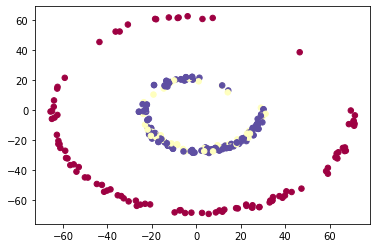

In [2]:
# reading data from csv and extracting data points belonging to each class and restructuring 
# and using first 100 points from each class as train and rest 50 each class as test;

data=np.genfromtxt("traingroup11.csv",delimiter=',',skip_header=1)
print(data.shape)
c0=data[data[:,2]==0.0]
c1=data[data[:,2]==1.0]
c2=data[data[:,2]==2.0]
data1=np.zeros((0,3))
for i in range(451):
    if i%3==0:
        data1=np.append(data1,c0[int(i/3)].reshape(1,3),axis=0)
    elif i&3==1:
        data1=np.append(data1,c1[int(i/3)].reshape(1,3),axis=0)
    else:
        data1=np.append(data1,c2[int(i/3)].reshape(1,3),axis=0)
test=data1[301:,:]
train=data1[0:300,:]
X_train = train[:, :2]
Y_train = train[:, 2]
X_train1=X_train
Y_train1=Y_train
expected_out=Y_train


plt.scatter(X_train1[:,0],X_train1[:,1], c=Y_train1, s=30, cmap=plt.cm.Spectral);

l1_nodes=7
l2_nodes=5

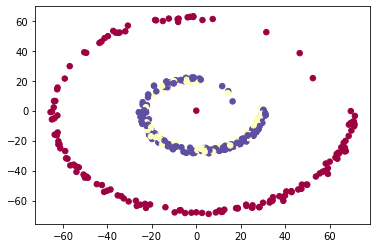

In [3]:
plt.scatter(data1[:,0],data1[:,1], c=data1[:,2], s=30, cmap=plt.cm.Spectral);

(121, 3)


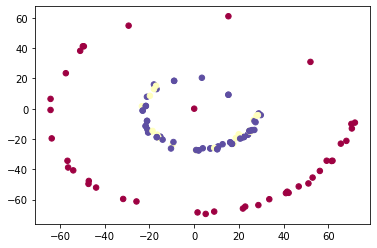

In [15]:
# reading data from csv and extracting data points belonging to each class and restructuring 
# and using first 100 points from each class as train and rest 50 each class as test;

data=np.genfromtxt("testgroup11.csv",delimiter=',',skip_header=1)
print(data.shape)
c0=data[data[:,2]==0.0]
c1=data[data[:,2]==1.0]
c2=data[data[:,2]==2.0]
data1=np.zeros((0,3))
for i in range(121):
    if i%3==0:
        data1=np.append(data1,c0[int(i/3)].reshape(1,3),axis=0)
    elif i&3==1:
        data1=np.append(data1,c1[int(i/3)].reshape(1,3),axis=0)
    else:
        data1=np.append(data1,c2[int(i/3)].reshape(1,3),axis=0)
real_test=data1
X_real_test = real_test[:, :2]
Y_real_test = real_test[:, 2]
expected_real_out = Y_real_test

plt.scatter(X_real_test[:,0],X_real_test[:,1], c=Y_real_test, s=30, cmap=plt.cm.Spectral);

l1_nodes=7
l2_nodes=5

In [4]:
X_val = test[:, :2]
Y_val = test[:, 2]
expected_out1=Y_val

In [5]:
X_train=X_train.T
Y_train=Y_train.T
Y_train.shape
a=Y_train

Y_train=Y_train.astype(int)

In [6]:
#converting Y_train to different usable form;

b = np.zeros((Y_train.size, Y_train.max()+1))
b[np.arange(Y_train.size),Y_train] = 1
Y_train=b

In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [8]:



def nn_model(X, Y,  num_iterations ,print_cost=False,learning_rate = 0.01,beta = 0.9):
    req_params=[]                   
     
    #initializing parameters;
    
    W1 = np.random.randn(l1_nodes,2) * np.sqrt(2/l1_nodes)
    b1 = np.zeros(shape=(l1_nodes, 1))
    W2 = np.random.randn(l2_nodes, l1_nodes) * np.sqrt(2/l2_nodes)
    b2 = np.zeros(shape=(l2_nodes, 1))
    W3 = np.random.randn(3, l2_nodes) * np.sqrt(2/3)
    b3 = np.zeros(shape=(3, 1))
    
    
    vW1 = np.zeros_like(W1)
    vb1 = np.zeros_like(b1)
    vW2 = np.zeros_like(W2)
    vb2= np.zeros_like(b2)
    vW3 = np.zeros_like(W3)
    vb3= np.zeros_like(b3)
    
    
    costs=[]
    for i in range(0, num_iterations):  
        
    #farward propagation steps, parameter calculation;
        Z1 = np.dot(W1, X) + b1
        A1 = np.tanh(Z1)

        Z2 = np.dot(W2, A1) + b2
        A2 = np.tanh(Z2)

        Z3 = np.dot(W3, A2) + b3
        A3 = sigmoid(Z3)
        
        
        m=300
        
        #calculating cost;
        cost = cost = (-1/m)*np.sum(np.multiply(np.log(A3), Y) + np.multiply((1 - Y), np.log(1 - A3)))
        if i % 100 == 0:
            costs.append(cost)

        # Backpropagation steps, parameter calculation;
        dZ3 = A3 - Y
        dW3 = (1 / m) * np.dot(dZ3, A2.T)
        db3 = (1 / m) * np.sum(dZ3, axis=1, keepdims=True)
        dZ2 = np.multiply(np.dot(W3.T, dZ3), 1 - np.power(A2, 2))
        dW2 = (1 / m) * np.dot(dZ2, A1.T)
        db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
        dW1 = (1 / m) * np.dot(dZ1, X.T)
        db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

        # parameter updating using generalised delta method;
        vW1 = beta * vW1 + (1 - beta) * dW1
        vb1 = beta * vb1 + (1 - beta) * db1
        vW2 = beta * vW2 + (1 - beta) * dW2
        vb2 = beta * vb2 + (1 - beta) * db2
        vW3 = beta * vW3 + (1 - beta) * dW3
        vb3 = beta * vb3 + (1 - beta) * db3
 
        W1 = W1 - learning_rate * vW1
        b1 = b1 - learning_rate * vb1
        W2 = W2 - learning_rate * vW2
        b2 = b2 - learning_rate * vb2
        W3 = W3 - learning_rate * vW3
        b3 = b3 - learning_rate * vb3
        
        
        if(print_cost and i%1000==0):
            print("cost ",cost)
            
        parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3
                 }
        if (i==1 or i==2 or i==10 or i==50 or i==60000-1):
            req_params+=[parameters]
    return parameters,costs,req_params

In [9]:
parameters,costs,req_params = nn_model(X_train, Y_train.T,  num_iterations = 60000, print_cost=True)

cost  2.2656942942958906
cost  1.6969479668356127
cost  1.3653868106497982
cost  0.9945555631691093
cost  0.8825371946220634
cost  0.8420877040537347
cost  0.8162506884993298
cost  0.7989189312807594
cost  0.7868746472983895
cost  0.7779011661675649
cost  0.7708594505469504
cost  0.7651037056637753
cost  0.7602413646880751
cost  0.7560178487112762
cost  0.7522581270831644
cost  0.7488374698315645
cost  0.7456696644754521
cost  0.7427081540468328
cost  0.7399540126884226
cost  0.7374445045736877
cost  0.735194893559062
cost  0.7331661605776614
cost  0.731308183168145
cost  0.7295873172628599
cost  0.7279815749176983
cost  0.7264741685775743
cost  0.7250509925751194
cost  0.7236997510209539
cost  0.7224095797773848
cost  0.7211708303963225
cost  0.7199749336218021
cost  0.718814335323706
cost  0.7176825193020148
cost  0.7165741230618864
cost  0.7154851180535876
cost  0.7144129764289052
cost  0.713356713590804
cost  0.7123167188318663
cost  0.7112943729493919
cost  0.7102915528972392
cost

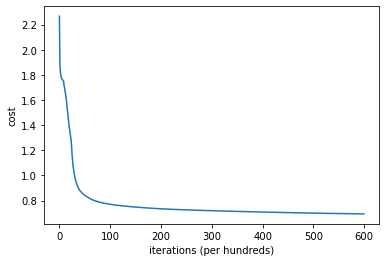

In [10]:
# plot of epochs vs cost;
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')

plt.show()



In [11]:
def predict(parameters, X):  

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
   
    
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    
    Z2 = np.dot(W2, A1) + b2
    A2 = np.tanh(Z2)
    
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    predictions = np.argmax(A3,axis=0)
    
    return predictions



In [12]:
pred=predict(parameters, X_train)
count=0
count1=0
pred1=predict(parameters,X_val.T)
i=0
j=0
while i<300:
    if(pred[i]==expected_out[i]):
        count=count+1
    i=i+1
while j<150:
    if(pred1[j]==expected_out1[j]):
        count1=count1+1
    j=j+1
print("train accuracy =",count/301)
print("test accuracy =",count1/150)

train accuracy = 0.8438538205980066
test accuracy = 0.78


In [17]:
pred2 = predict(parameters,X_real_test.T)
j = 0
count2 = 0
while j<121:
    if(pred2[j]==expected_real_out[j]):
        count2=count2+1
    j=j+1
print("real test accuracy =",count2/121)

real test accuracy = 0.7933884297520661


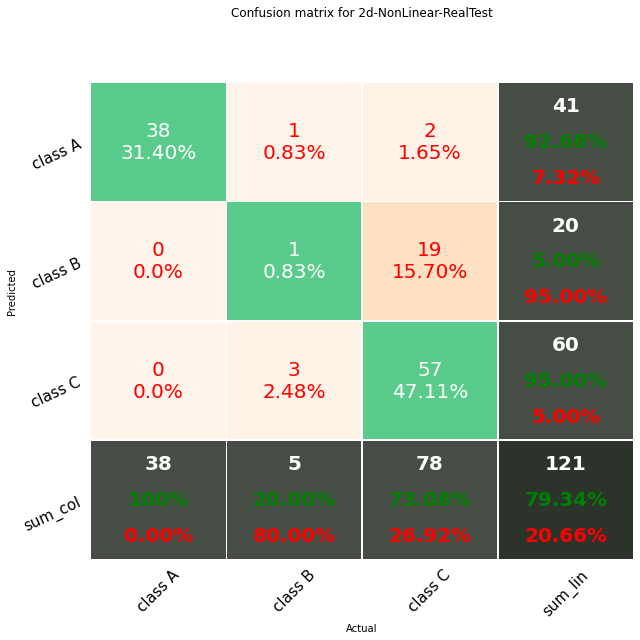

In [21]:
the_plot_conf(pred2,expected_real_out,"2d-NonLinear-RealTest")

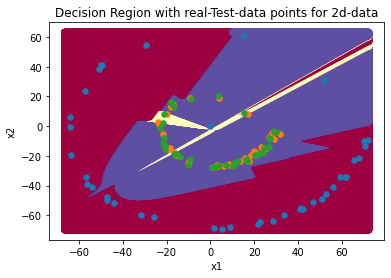

In [22]:
# ploting decision boundary overlaped with train data;
def plot_decision_boundary(parameters, X):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.1
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = (np.c_[xx.ravel(), yy.ravel()])
    Z = (np.c_[xx.ravel(), yy.ravel()])
    pred=predict(parameters, Z.T)
    pred=pred.reshape(xx.shape)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(xx, yy, c=pred, cmap=plt.cm.Spectral)
    plt.scatter(c0[0:105,0],c0[0:105,1] , s=30)
    plt.scatter(c1[0:105,0],c1[0:105,1] , s=30)
    plt.scatter(c2[0:105,0],c2[0:105,1] , s=30)
    plt.title("Decision Region with real-Test-data points for 2d-data")
plot_decision_boundary(parameters, X_train)

In [ ]:
# ploting decision boundary overlaped with test data;
def plot_decision_boundary(parameters, X):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.1
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = (np.c_[xx.ravel(), yy.ravel()])
    Z = (np.c_[xx.ravel(), yy.ravel()])
    pred=predict(parameters, Z.T)
    pred=pred.reshape(xx.shape)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(xx, yy, c=pred, cmap=plt.cm.Spectral)
    plt.scatter(c0[105:,0],c0[105:,1] , s=30)
    plt.scatter(c1[105:,0],c1[105:,1] , s=30)
    plt.scatter(c2[105:,0],c2[105:,1] , s=30)
    plt.title("Decision Region with test-data points for 2d-data")
plot_decision_boundary(parameters, X_train)   

In [ ]:
# functions for plotting node output of each layer;
def last_layer(j,params,epoch):
    
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    W3 = params['W3']
    b3 = params['b3']
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    import numpy as np
    x_min, x_max = X_train[0, :].min() - 1, X_train[0, :].max() + 1
    y_min, y_max = X_train[1, :].min() - 1, X_train[1, :].max() + 1
    b = np.arange(x_min,x_max, 0.2)
    d = np.arange(y_min, y_max, 0.2)

    B, D = np.meshgrid(b, d)
    X =np.c_[B.ravel(), D.ravel()]
    x1=np.tanh(np.dot(W1, X.T) + b1)
    x2=np.tanh(np.dot(W2, x1) + b2)
    x3=sigmoid(np.dot(W3, x2) + b3)
    nu=x3[j]
    nu=nu.reshape(B.shape[0],B.shape[1])
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(B, D, nu,cmap=plt.cm.Spectral)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title("epochs-"+epoch+" outputlayer, node-"+str(j+1))
#     plt.savefig("epochs-"+epoch+" outputlayer-node-"+str(j+1)+".jpg")
def first_layer(j,params,epoch):
    
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    W3 = params['W3']
    b3 = params['b3']
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    import numpy as np
    x_min, x_max = X_train[0, :].min() - 1, X_train[0, :].max() + 1
    y_min, y_max = X_train[1, :].min() - 1, X_train[1, :].max() + 1
    b = np.arange(x_min,x_max, 0.2)
    d = np.arange(y_min, y_max, 0.2)

    B, D = np.meshgrid(b, d)
    X =np.c_[B.ravel(), D.ravel()]
    x1=np.tanh(np.dot(W1, X.T) + b1)
    x2=np.tanh(np.dot(W2, x1) + b2)
    x3=sigmoid(np.dot(W3, x2) + b3)
    nu=x1[j]
    nu=nu.reshape(B.shape[0],B.shape[1])
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(B, D, nu,cmap=plt.cm.Spectral)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title("epochs-"+epoch+" hiddenlayer-1, node-"+str(j+1))
#     plt.savefig("epochs-"+epoch+" hiddenlayer1-node-"+str(j+1)+".jpg")
def second_layer(j,params,epoch):
    
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    W3 = params['W3']
    b3 = params['b3']
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    import numpy as np
    x_min, x_max = X_train[0, :].min() - 1, X_train[0, :].max() + 1
    y_min, y_max = X_train[1, :].min() - 1, X_train[1, :].max() + 1
    b = np.arange(x_min,x_max, 0.2)
    d = np.arange(y_min, y_max, 0.2)

    B, D = np.meshgrid(b, d)
    X =np.c_[B.ravel(), D.ravel()]
    x1=np.tanh(np.dot(W1, X.T) + b1)
    x2=np.tanh(np.dot(W2, x1) + b2)
    x3=sigmoid(np.dot(W3, x2) + b3)
    nu=x2[j]
    nu=nu.reshape(B.shape[0],B.shape[1])
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(B, D, nu,cmap=plt.cm.Spectral)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title("epochs-"+epoch+" hiddenlayer-2, node-"+str(j+1))
#     plt.savefig("epochs-"+epoch+" hiddenlayer2-node-"+str(j+1)+".jpg")
          

In [ ]:
def print_every_layer_node_outputs(p,i,e):
    
    print("first layer 8 nodes-",e)
    print (" iterations")
    first_layer(0,p,e)
    first_layer(1,p,e)
    first_layer(2,p,e)
    first_layer(3,p,e)
    first_layer(4,p,e)
    first_layer(5,p,e)
    first_layer(6,p,e)
#     first_layer(7,p)
    print("second layer 5 nodes-",e)
    second_layer(0,p,e)
    second_layer(1,p,e)
    second_layer(2,p,e)
    second_layer(3,p,e)
    second_layer(4,p,e)
    print("last layer 3 nodes-",e)
    last_layer(0,p,e)
    last_layer(1,p,e)
    last_layer(2,p,e)

In [ ]:
def print_all_required_images():
    for i in range(len(req_params)): 
        temp=0
        if(i==0):
            temp='1'
        elif(i==1):
            temp='2'
        elif(i==2):
            temp='10'
        elif(i==3):
            temp='50'
        elif(i==4):
            temp='end'
        print_every_layer_node_outputs(req_params[i],i,temp)

In [ ]:
print_all_required_images()

In [19]:
# for pretty plot confusion matrix

from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.collections import QuadMesh
import seaborn as sn
import warnings


def get_new_fig(fn, figsize=[9,9]):
    """ Init graphics """
    fig1 = plt.figure(fn, figsize)
    ax1 = fig1.gca()   #Get Current Axis
    ax1.cla() # clear existing plot
    return fig1, ax1
#

def configcell_text_and_colors(array_df, lin, col, oText, facecolors, posi, fz, fmt, show_null_values=0):
    """
      config cell text and colors
      and return text elements to add and to dell
      @TODO: use fmt
    """
    text_add = []; text_del = [];
    cell_val = array_df[lin][col]
    tot_all = array_df[-1][-1]
    per = (float(cell_val) / tot_all) * 100
    curr_column = array_df[:,col]
    ccl = len(curr_column)

    #last line  and/or last column
    if(col == (ccl - 1)) or (lin == (ccl - 1)):
        #tots and percents
        if(cell_val != 0):
            if(col == ccl - 1) and (lin == ccl - 1):
                tot_rig = 0
                for i in range(array_df.shape[0] - 1):
                    tot_rig += array_df[i][i]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(col == ccl - 1):
                tot_rig = array_df[lin][lin]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(lin == ccl - 1):
                tot_rig = array_df[col][col]
                per_ok = (float(tot_rig) / cell_val) * 100
            per_err = 100 - per_ok
        else:
            per_ok = per_err = 0

        per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]

        #text to DEL
        text_del.append(oText)

        #text to ADD
        font_prop = fm.FontProperties(weight='bold', size=fz)
        text_kwargs = dict(color='w', ha="center", va="center", gid='sum', fontproperties=font_prop)
        lis_txt = ['%d'%(cell_val), per_ok_s, '%.2f%%'%(per_err)]
        lis_kwa = [text_kwargs]
        dic = text_kwargs.copy(); dic['color'] = 'g'; lis_kwa.append(dic);
        dic = text_kwargs.copy(); dic['color'] = 'r'; lis_kwa.append(dic);
        lis_pos = [(oText._x, oText._y-0.3), (oText._x, oText._y), (oText._x, oText._y+0.3)]
        for i in range(len(lis_txt)):
            newText = dict(x=lis_pos[i][0], y=lis_pos[i][1], text=lis_txt[i], kw=lis_kwa[i])
            #print 'lin: %s, col: %s, newText: %s' %(lin, col, newText)
            text_add.append(newText)
        #print '\n'

        #set background color for sum cells (last line and last column)
        carr = [0.27, 0.30, 0.27, 1.0]
        if(col == ccl - 1) and (lin == ccl - 1):
            carr = [0.17, 0.20, 0.17, 1.0]
        facecolors[posi] = carr

    else:
        if(per > 0):
            txt = '%s\n%.2f%%' %(cell_val, per)
        else:
            if(show_null_values == 0):
                txt = ''
            elif(show_null_values == 1):
                txt = '0'
            else:
                txt = '0\n0.0%'
        oText.set_text(txt)

        #main diagonal
        if(col == lin):
            #set color of the textin the diagonal to white
            oText.set_color('w')
            # set background color in the diagonal to blue
            facecolors[posi] = [0.35, 0.8, 0.55, 1.0]
        else:
            oText.set_color('r')

    return text_add, text_del
#

def insert_totals(df_cm):
    """ insert total column and line (the last ones) """
    sum_col = []
    for c in df_cm.columns:
        sum_col.append( df_cm[c].sum() )
    sum_lin = []
    for item_line in df_cm.iterrows():
        sum_lin.append( item_line[1].sum() )
    df_cm['sum_lin'] = sum_lin
    sum_col.append(np.sum(sum_lin))
    df_cm.loc['sum_col'] = sum_col
    #print ('\ndf_cm:\n', df_cm, '\n\b\n')
#

def pretty_plot_confusion_matrix(df_cm,st,annot=True, cmap="Oranges", fmt='.2f', fz=20,
      lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='y'):
    """
      print conf matrix with default layout (like matlab)
      params:
        df_cm          dataframe (pandas) without totals
        annot          print text in each cell
        cmap           Oranges,Oranges_r,YlGnBu,Blues,RdBu, ... see:
        fz             fontsize
        lw             linewidth
        pred_val_axis  where to show the prediction values (x or y axis)
                        'col' or 'x': show predicted values in columns (x axis) instead lines
                        'lin' or 'y': show predicted values in lines   (y axis)
    """
    if(pred_val_axis in ('col', 'x')):
        xlbl = 'Predicted'
        ylbl = 'Actual'
    else:
        xlbl = 'Actual'
        ylbl = 'Predicted'
        df_cm = df_cm.T

    # create "Total" column
    insert_totals(df_cm)

    #this is for print allways in the same window
    fig, ax1 = get_new_fig('Conf matrix default', figsize)

    #thanks for seaborn
    ax = sn.heatmap(df_cm, annot=annot, annot_kws={"size": fz}, linewidths=lw, ax=ax1,
                    cbar=cbar, cmap=cmap, linecolor='w', fmt=fmt)

    #set ticklabels rotation
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, fontsize = 15)
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 25, fontsize = 15)

    # Turn off all the ticks
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    #face colors list
    quadmesh = ax.findobj(QuadMesh)[0]
    facecolors = quadmesh.get_facecolors()

    #iter in text elements
    array_df = np.array( df_cm.to_records(index=False).tolist() )
    text_add = []; text_del = [];
    posi = -1 #from left to right, bottom to top.
    for t in ax.collections[0].axes.texts: #ax.texts:
        pos = np.array( t.get_position()) - [0.5,0.5]
        lin = int(pos[1]); col = int(pos[0]);
        posi += 1
        #print ('>>> pos: %s, posi: %s, val: %s, txt: %s' %(pos, posi, array_df[lin][col], t.get_text()))

        #set text
        txt_res = configcell_text_and_colors(array_df, lin, col, t, facecolors, posi, fz, fmt, show_null_values)

        text_add.extend(txt_res[0])
        text_del.extend(txt_res[1])

    #remove the old ones
    for item in text_del:
        item.remove()
    #append the new ones
    for item in text_add:
        ax.text(item['x'], item['y'], item['text'], **item['kw'])

    #titles and legends
    ax.set_title('Confusion matrix for'+st)
    ax.set_xlabel(xlbl)
    ax.set_ylabel(ylbl)
    plt.ylim([len(df_cm), -.5])
    plt.tight_layout()  #set layout slim
    plt.show()
#

def plot_confusion_matrix_from_data(y_test,st,predictions, columns=None, annot=True, cmap="Oranges",
      fmt='.2f', fz=20, lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='lin'):
    """
        plot confusion matrix function with y_test (actual values) and predictions (predic),
        whitout a confusion matrix yet
    """
    from sklearn.metrics import confusion_matrix
    from pandas import DataFrame

    #data
    if(not columns):
        #labels axis integer:
        ##columns = range(1, len(np.unique(y_test))+1)
        #labels axis string:
        from string import ascii_uppercase
        columns = ['class %s' %(i) for i in list(ascii_uppercase)[0:len(np.unique(y_test))]]

    confm = confusion_matrix(y_test, predictions)
    cmap = 'Oranges';
    fz = 20;
    figsize=[9,9];
    show_null_values = 2
    df_cm = DataFrame(confm, index=columns, columns=columns)
    pretty_plot_confusion_matrix(df_cm,st,fz=fz, cmap=cmap, figsize=figsize, show_null_values=show_null_values, pred_val_axis=pred_val_axis)
#

def the_plot_conf(test,pred,st):
    """ test function with y_test (actual values) and predictions (predic) """
    #data
    warnings.filterwarnings("ignore")
    y_test = np.array(test)
    predic = np.array(pred)
    """
      Examples to validate output (confusion matrix plot)
        actual: 5 and prediction 1   >>  3
        actual: 2 and prediction 4   >>  1
        actual: 3 and prediction 4   >>  10
    """
    columns = []
    annot = True;
    cmap = 'Oranges';
    fmt = '.2f'
    lw = 0.5
    cbar = False
    show_null_values = 2
    pred_val_axis = 'y'
    #size::
    fz = 20;
    figsize = [9,9];
    if(len(y_test) > 10):
        fz=20; figsize=[14,14];
    plot_confusion_matrix_from_data(y_test," "+st,predic, columns,
      annot, cmap, fmt, fz, lw, cbar, figsize, show_null_values, pred_val_axis)